In [2]:
%load ImportsDefinitions.py


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexi

In [3]:
#fortwnoume to dataset me ta reviews apo to imdb
X_all= pd.read_csv('IMDBDataset.csv', header=0)
print(X_all.head(5))
#kanoume examine ta dedomena mas, data examination
#X=X_all.sample(100,random_state=1) # pairnoume ena tyxaio deigma apo ta sample mas
X=X_all
numOfRows = X.shape[0]
print("Τα NULL δεδομένα στο dataset μας είναι: {}".format(X.isnull().sum()))
print('Έχουμε {} κριτικές στο dataset μας'.format(numOfRows))

sentiments=[]
for x in X['sentiment']:
    #print(x)
    if (x=='positive'):
        sentiments.append(1)
        #print(x)
    else:
        sentiments.append(0)
#print(sentiments)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Τα NULL δεδομένα στο dataset μας είναι: review       0
sentiment    0
dtype: int64
Έχουμε 50000 κριτικές στο dataset μας


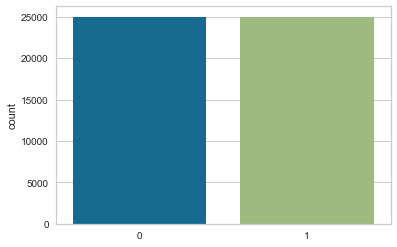

Έχουμε 25000 χαρούμενα τραγούδια
Έχουμε 25000 στενάχωρα τραγούδια


In [4]:
sns.countplot(sentiments,label="Count")
plt.show()
print("Έχουμε {} χαρούμενα τραγούδια".format(sentiments.count(1)))
print("Έχουμε {} στενάχωρα τραγούδια".format(sentiments.count(0)))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X['review'], sentiments, test_size=0.2, random_state=2)

Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΧΩΡΙΣ ΤΟΚΕΝΙΖΕR
Number of features: 92882
to accuracy tou CountVectorizer me NB einai: 0.8466500942490011


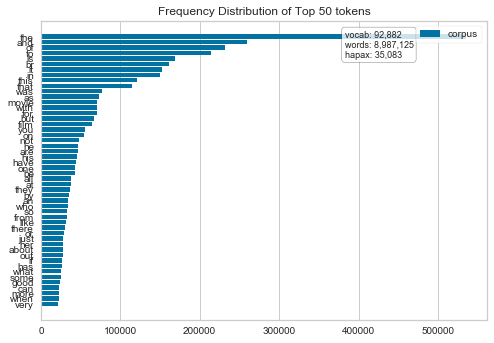

Number of features: 92882
to accuracy tou TFIDF me NB einai 0.8610001468192514


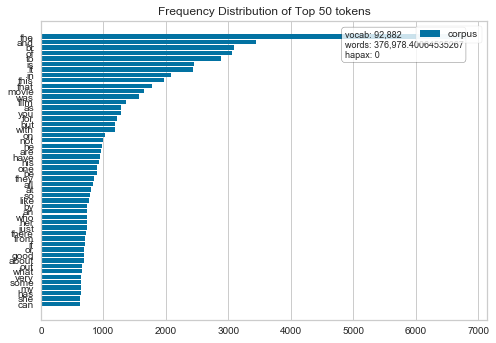

Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΜΕ ΤΟΚΕΝΙΖΕR
Number of features: 108978
to accuracy tou CountVectorizer me NB einai: 0.8562751167917511


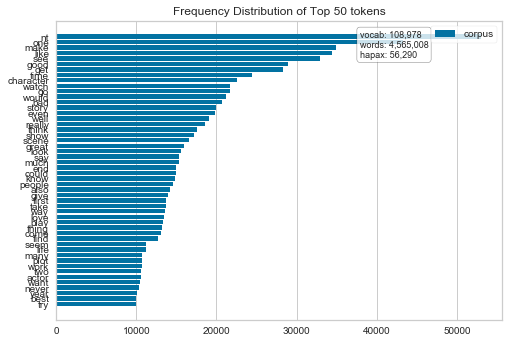

Number of features: 108978
to accuracy tou TFIDF me NB einai 0.8618500543180005


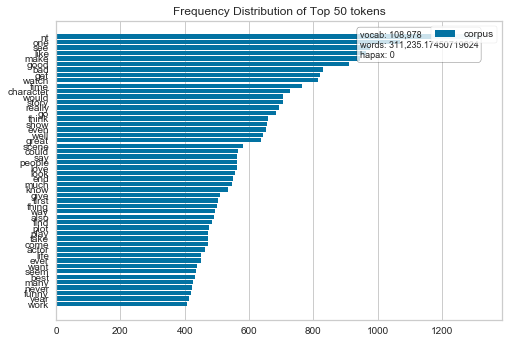

In [8]:
#αξιολόγηση CountVect kai TFIDF gia synaisthimatikh analysh me SentiWordNet

token_iser='0'
scores=[]

print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΧΩΡΙΣ ΤΟΚΕΝΙΖΕR")
scores.append(countvect_test_simple(X_train,X_test,y_train,y_test,token_iser))
scores.append(tfidf_test_simple(X_train,X_test,y_train,y_test,token_iser))

token_iser='2'

print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΜΕ ΤΟΚΕΝΙΖΕR")
scores.append(countvect_test_simple(X_train,X_test,y_train,y_test,token_iser))
scores.append(tfidf_test_simple(X_train,X_test,y_train,y_test,token_iser))



In [9]:
# DataFrame Vectorizer Accuracy 
acc_df = pd.DataFrame()
acc_df['params']= ['cvec without tokenizer','tvec without tokenizer','cvec with tokenizer','tvect with tokenizer']
acc_df['scores']= scores
acc_df

,params,scores
0,cvec without tokenizer,0.846650
1,tvec without tokenizer,0.861000
2,cvec with tokenizer,0.856275
3,tvect with tokenizer,0.861850


In [10]:
#Αναζητούμε τις καλύτερες παραμέτρους για το dataset μας
#parametropoihsh vectorizer
ngrams=[1,2,3,4]
mdf_params = [0.25, 0.5, 0.75, 1.0]
maxfeat=[5000,20000,50000,100000,None]

#θα υλοποιησουμε διαφορετικους count vectorizers με logreg για να βρουμε την καλυτερη επιδοση
#θα ορισουμε τις λιστες στις οποιες θα αποθηκευσουμε τα αποτελεσματα
ngram_scores=[]
mdf_scores=[]
maxfeat_scores=[]


token_izer='2'

for mf in maxfeat:
    maxfeat_scores.append(tfidf_test_maxfeat(X_train,X_test,y_train,y_test,token_izer,mf))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max Features ειναι: {}".format(maxfeat_scores))

for mdf in mdf_params:
    mdf_scores.append(tfidf_test_maxdf(X_train,X_test,y_train,y_test,token_izer,mdf))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max DF ειναι: {}".format(mdf_scores))
for n in ngrams:
    ngram_scores.append(tfidf_test_ngrams(X_train,X_test,y_train,y_test,token_izer,n))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά n-grams ειναι: {}".format(ngram_scores))


Number of features: 5000
To accuracy NB me max featurues : 5000 είναι : [0.85161484 0.8478     0.8485     0.8529853 ] 
Number of features: 20000
To accuracy NB me max featurues : 20000 είναι : [0.85941406 0.8573     0.859      0.86328633] 
Number of features: 50000
To accuracy NB me max featurues : 50000 είναι : [0.86231377 0.8598     0.8607     0.86468647] 
Number of features: 100000
To accuracy NB me max featurues : 100000 είναι : [0.86251375 0.8594     0.8607     0.86488649] 
Number of features: 108978
To accuracy NB me max featurues : None είναι : [0.86251375 0.8593     0.8609     0.86468647] 
Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max Features ειναι: [0.8502250342615003, 0.859750096806751, 0.8618750593175006, 0.8618750593185006, 0.8618500543180005]
Number of features: 108948
To accuracy NB me max df: 0.25 είναι : [0.86191381 0.8574     0.8606     0.86328633] 
Number of features: 108975
To accuracy NB me max df: 0.5 είναι : [0.86381362 0.8604     0.8612     

Τα αποτελέσματα για τα διαφορετικά ngrams είναι
   params    scores
0       1  0.861850
1       2  0.881400
2       3  0.882650
3       4  0.882425


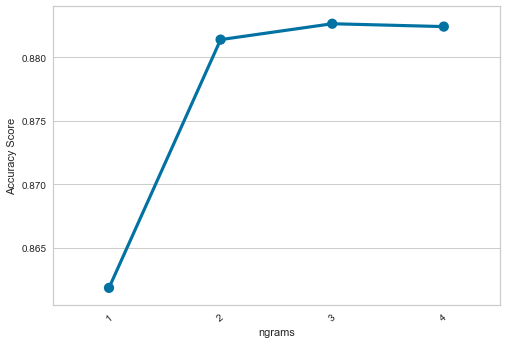

Τα αποτελέσματα για τα διαφορετικά max df είναι
   params   scores
0    0.25  0.86080
1    0.50  0.86235
2    0.75  0.86185
3    1.00  0.86185


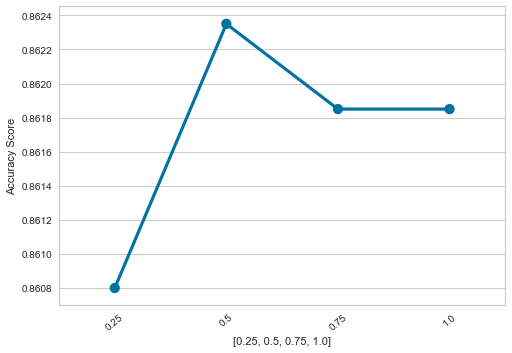

Τα αποτελέσματα για τα διαφορετικά max features είναι
   params    scores
0    None  0.850225
1    5000  0.859750
2   20000  0.861875
3   50000  0.861875
4  100000  0.861850


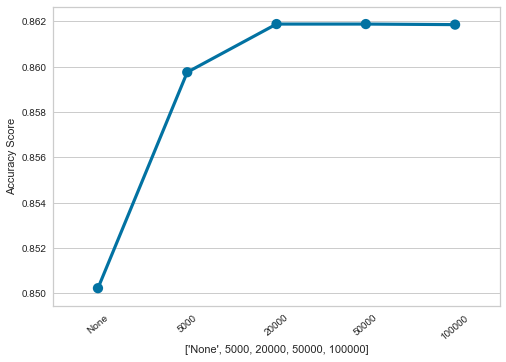

In [11]:
#Δημιουργούμε Dataframes με τα διαφοερτικα αποτελέσματα μας και τα εκτυπώνουμε
ngrams=[1,2,3,4]
ngram_params = ['tvec gram_1','tvec gram_2','tvec gram_3','tvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])
print("Τα αποτελέσματα για τα διαφορετικά ngrams είναι")
print(ngram_df)
# adding cvec score with default params
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

mdf_params = [0.25, 0.5, 0.75, 1.0]
maxdf_df = pd.DataFrame({'params':mdf_params, 'scores':mdf_scores}, index=[0,1,2,3])
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά max df είναι")
print(maxdf_df)
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxdf_df)
plt.ylabel('Accuracy Score')
plt.xlabel(mdf_params)
plt.xticks(rotation=40)
plt.show()

maxfeat=['None',5000,20000,50000,100000]
maxfeat_df = pd.DataFrame({'params':maxfeat, 'scores':maxfeat_scores}, index=[0,1,2,3,4])
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά max features είναι")
print(maxfeat_df)
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxfeat_df)
plt.ylabel('Accuracy Score')
plt.xlabel(maxfeat)
plt.xticks(rotation=40)
plt.show()







In [12]:
#Επιλογή καλύτερων features για τον vectorizer
print(max(maxfeat_scores))#Βλέπουμε ότι το καλύτερο score είναι με maxfeat=None
print(max(ngram_scores))
print(max(mdf_scores))


0.8618750593185006
0.882650086928751
0.8623500043195


In [7]:
#δοκιμαζουμε με τον καλυτερο vectorizer διαφορετικους classifiers
# initalise the vectoriser 
tvec = TfidfVectorizer(tokenizer=tokenizer_preproccessor_imdb,ngram_range=(1,3))
# fit the training data on the model
#transform training data into sparse matrix
X_train_tvec=tvec.fit_transform(X_train)


X_test_tvec=tvec.transform(X_test)
#print(X_train_tvec)

In [5]:
# #δοκιμαζουμε διαφορετικούς classifiers
classifier_finder(X_train_tvec,X_test_tvec,y_train,y_test)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Η επιτυχία του  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8810252798422049
Η επιτυχία του  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) είναι:  0.8847748298984268
Η επιτυχία του  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.7302998341374896


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Η επιτυχία του  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) είναι:  0.7558743844343365
Η επιτυχία του  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) είναι:  0.9002501050765692
                    params    scores
0     Logistisc Regression  0.881025
1  Multinomial Naive Bayes  0.884775
2            Decision Tree  0.730300
3            Random Forest  0.755874
4               Linear SVC  0.900250


In [12]:
#Gridsearch τρίτης περίπτωσης
max_iter=[110,1000,2000]
C = [0.1,1,10]
param_grid = dict(max_iter=max_iter,C=C)

lSVC=LinearSVC()
grid = GridSearchCV(estimator=lSVC, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train_tvec, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.902525 using {'C': 10, 'max_iter': 110}
Execution time: 1047.99551820755 ms


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
#best_clf_imdb = LinearSVC(**grid_result.best_params_)
best_clf_imdb = LinearSVC(C=10,max_iter=110)
best_clf_imdb.fit(X_train_tvec,y_train)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=110,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [14]:
#σωζουμε τα test sets, τον best_clf_sentiwordnet και τον vectorizer
saveList(X_test,"X_test_imdb")
saveList(y_test,"y_test_imdb")


saveList(X_test_tvec,"X_test_imdb_dtm")
joblib.dump(best_clf_imdb, 'imdb_clf.pkl')
joblib.dump(tvec, 'imdb_tvec.pkl')

Saved successfully!
Saved successfully!
Saved successfully!


['imdb_tvec.pkl']